In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
import tensorflow as tf
import matplotlib.pyplot as plt
import random

C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\___Anaconda\envs\forTFgpu\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [14]:

training_epochs = 15
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))


Epoch :  0001 cost =  2.938663342
Epoch :  0002 cost =  1.047128781
Epoch :  0003 cost =  0.824554746
Epoch :  0004 cost =  0.719371201
Epoch :  0005 cost =  0.654395728
Epoch :  0006 cost =  0.609241412
Epoch :  0007 cost =  0.575103434
Epoch :  0008 cost =  0.548909115
Epoch :  0009 cost =  0.527033016
Epoch :  0010 cost =  0.508876934
Epoch :  0011 cost =  0.494070393
Epoch :  0012 cost =  0.480471699
Epoch :  0013 cost =  0.468842221
Epoch :  0014 cost =  0.458225351
Epoch :  0015 cost =  0.448667817


Accuracy :  0.8938
Label: [0]
Prediction: [0]


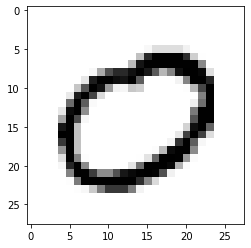

In [20]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("Accuracy : ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y:mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print('Label:', sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print('Prediction:', sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [98]:
sess1.close()